In [34]:
#Importing the required libraries

In [71]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization
from tensorflow.keras.models import load_model
from PIL import Image


In [36]:
#Loading the Data

In [37]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

In [38]:
#Analyzing the Data

In [39]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [40]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

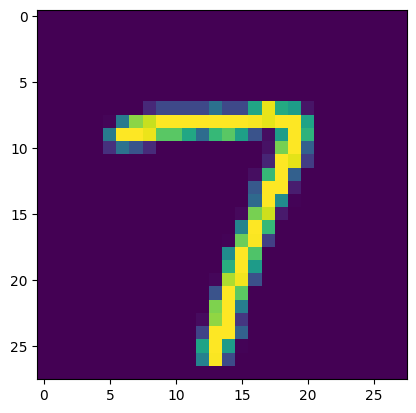

In [41]:
plt.imshow(x_train[5100])

In [42]:
np.argmax(y_train[5100])

0

In [43]:
#Reshaping the Data

In [44]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [45]:
#Applying one hot encoding

In [46]:
classes = 10 

In [47]:
y_train = np_utils.to_categorical (y_train, classes) 
y_test = np_utils.to_categorical (y_test, classes)

In [48]:
#Adding  CNN Buliding

In [49]:
model=Sequential()

In [50]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))

In [51]:
model.add(Conv2D(64,(3,3),activation='relu'))

In [52]:
model.add(Flatten())

In [53]:
model.add(Dense(classes,activation='softmax'))

In [54]:
#Compiling The Model

In [55]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [56]:
#Training the Model

In [57]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 421s 201ms/step - loss: 0.2894 - accuracy: 0.9534 - val_loss: 0.0899 - val_accuracy: 0.9723
Epoch 2/5
1875/1875 [==============================] - 368s 196ms/step - loss: 0.0655 - accuracy: 0.9801 - val_loss: 0.0726 - val_accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 366s 195ms/step - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.0816 - val_accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 366s 195ms/step - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0921 - val_accuracy: 0.9784
Epoch 5/5
1875/1875 [==============================] - 381s 203ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.1131 - val_accuracy: 0.9794


In [58]:
#Observing The Metrics

In [61]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrice(Test loss & Test Accuracy):")
print(metrics)

Metrice(Test loss & Test Accuracy):
[0.11306477338075638, 0.9793999791145325]


In [62]:
#Test the Model

In [64]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 46ms/step
[[1.0790762e-12 6.1298213e-20 2.5642948e-11 3.2196228e-06 2.6713934e-18
  4.9393948e-19 4.4729822e-22 9.9999678e-01 4.7008491e-12 7.2015401e-12]
 [2.6780675e-16 1.9528340e-10 1.0000000e+00 3.4783203e-19 4.1479923e-19
  2.5868036e-25 3.9301166e-12 7.7578430e-26 3.7328484e-14 7.2977025e-24]
 [2.5774399e-14 9.9999976e-01 1.0837886e-08 6.2097224e-19 1.0424989e-10
  8.8748570e-10 9.9499992e-12 2.8241554e-12 1.8270300e-07 3.6882221e-16]
 [1.0000000e+00 9.9909427e-20 5.9987788e-14 5.3880031e-20 2.9886360e-17
  1.6452022e-16 1.5441140e-11 4.0054316e-19 1.4564574e-15 1.5176280e-11]]


In [66]:
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [67]:
#Saving the model

In [68]:
model.save("Model/digitrec.h5")

In [72]:
#Test with Saved Model

In [73]:
model=load_model("./Model/digitrec.h5")

1/1 [==============================] - 0s 34ms/step


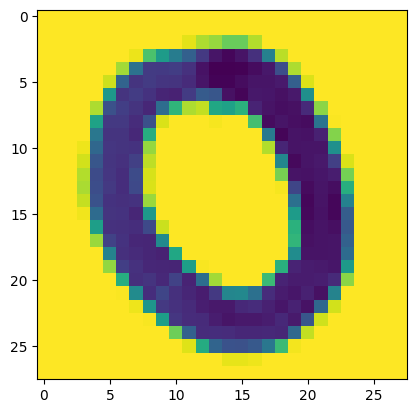

In [78]:
img=Image.open("test1.png").convert("L")
img=img.resize((28,28))
im2arr=np.array(img)
plt.imshow(im2arr)
im2arr=im2arr.reshape(1,28,28,1)
y_pred=list(model.predict(im2arr))

In [79]:
print(y_pred.index(max(y_pred)))

0
